# Analyse de Campagne Marketing - Grande Distribution

---

## Contexte et Objectifs

**Client :** Direction Marketing d'une multinationale de la grande distribution

### Objectifs Principaux
1. **Analyser, visualiser et interpréter** les données de campagne marketing
2. **Définir les KPIs pertinents** pour évaluer l'efficacité des campagnes
3. **Prédire la réponse client** aux futures campagnes

### Objectifs Finaux
- Chiffrer l'efficacité des campagnes marketing
- Réaliser des KPIs et fournir des chiffres clés
- Cerner la cible client et comprendre le public ciblé

### Livrables
- Analyses exploratoires complètes
- Modèles prédictifs de réponse client
- Segmentation client (clustering)
- Justification du feature engineering

## Table des Matières

1. **Importation des Bibliothèques**
2. **Chargement et Découverte des Données**
3. **Nettoyage et Prétraitement des Données**
4. **Feature Engineering**
5. **Définition et Calcul des KPIs**
6. **Segmentation Client (Clustering)**
7. **Modélisation Prédictive**
8. **Conclusions et Recommandations**

---
## 1) Importation des Bibliothèques

In [1]:
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning - Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Machine Learning - Modélisation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Machine Learning - Évaluation
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve
)

# Ignorer les warnings
import warnings 
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Toutes les bibliothèques ont été importées avec succès !")

✅ Toutes les bibliothèques ont été importées avec succès !


---
## 2️) Chargement et Découverte des Données

In [2]:
# Chargement des données
df = pd.read_csv('Camp_Market.csv', sep=';')

print("📊 Dimensions du dataset :")
print(f"   Nombre de lignes : {df.shape[0]}")
print(f"   Nombre de colonnes : {df.shape[1]}")
print("\n" + "="*80 + "\n")

# Affichage des premières lignes
print("📋 Aperçu des données :")
df.head(10)

📊 Dimensions du dataset :
   Nombre de lignes : 2240
   Nombre de colonnes : 29


📋 Aperçu des données :


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,1985,Graduation,Married,70951,0,0,04/05/2013,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,3,11,0
1,1,1961,Graduation,Single,57091,0,0,15/06/2014,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,0,3,11,1
2,9,1975,Master,Single,46098,1,1,18/08/2012,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,3,11,0
3,13,1947,PhD,Widow,25358,0,1,22/07/2013,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,3,11,0
4,17,1971,PhD,Married,60491,0,1,06/09/2013,81,637,47,237,12,19,76,4,6,11,7,5,0,0,0,0,0,0,3,11,0
5,20,1965,2n Cycle,Married,46891,0,1,01/09/2013,91,43,12,23,29,15,61,1,2,1,4,4,0,0,0,0,0,0,3,11,0
6,22,1976,Graduation,Divorced,46310,1,0,03/12/2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,3,11,0
7,24,1960,Master,Together,17144,1,1,15/02/2014,96,18,2,19,0,2,6,5,3,0,4,7,0,0,0,0,0,0,3,11,0
8,25,1958,Graduation,Married,65148,0,1,16/11/2012,9,460,35,422,33,12,153,2,6,6,7,4,0,0,0,0,0,0,3,11,0
9,35,1987,Graduation,Married,25545,1,0,08/09/2012,35,32,1,64,16,12,85,3,2,2,3,6,0,0,0,0,0,0,3,11,1


In [3]:
# Informations générales sur le dataset
print("ℹ️ Informations sur le dataset :")
print(df.info())
print("\n" + "="*80 + "\n")

# Statistiques descriptives
print("Statistiques descriptives :")
df.describe()

ℹ️ Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


---
## 3️) Nettoyage et Prétraitement des Données

In [4]:
#1 Dans Marital Status, remplacer "Alone" par "Single" et "Absurd" et "YOLO" par "Other"

new_value = {
    'Alone': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other'
}
df['Marital_Status'] = df['Marital_Status'].replace(new_value)
print("Valeurs dans 'Marital_Status' remplacées avec succès.")
print(df['Marital_Status'].head())  
df.head()

print("\n" + "="*80 + "\n")

# 1.5 Dans la colonne Income, change les , en .
df['Income'] = df['Income'].astype(str).str.replace(',', '.').astype(float)
print("Virgules dans 'Income' remplacées par des points avec succès.")
print(df['Income'].head())

print("\n" + "="*80 + "\n")

#2 Supprimer la ligne avec income = 666666

df = df[df['Income'] != 666666]
print("Ligne avec 'Income' = 666666 supprimée avec succès.")
# print(df['Income'].head())

print("\n" + "="*80 + "\n")

                                                



#4 Supprimer les lignes si la somme des canaux de distrib (NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases) = 0

df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df = df[df['Total_Purchases'] != 0]
df = df.drop(columns=['Total_Purchases'])
print("Lignes avec somme des canaux de distribution égale à 0 supprimées avec succès.")
# print(df.head())

print("\n" + "="*80 + "\n")


#5 Supprimer les lignes où la somme store/web/catalog < deals

df['Sum_Other_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df = df[df['Sum_Other_Purchases'] >= df['NumDealsPurchases']]
df = df.drop(columns=['Sum_Other_Purchases'])
print("Lignes où la somme store/web/catalog < deals supprimées avec succès.")
# print(df.head())   

print("\n" + "="*80 + "\n")


#6 Trier visuelement les campagnes Marketing dans le bon ordre
# ID - Year_birth - Education - Marital_Status - Income - Kidhome - Teenhome - Dt_Customer - Recency - MntWines - MntFruits - MntMeatProducts - MntFishProducts - MntSweetProducts - MntGoldProds - NumDealsPurchases - NumWebPurchases - NumCatalogPurchases - NumStorePurchases - NumWebVisitsMonth - AcceptedCmp1 - AcceptedCmp2 - AcceptedCmp3 - AcceptedCmp4 - AcceptedCmp5 - Response - Complain
# Suppresion des colonnes Z_CostContact et Z_Revenue car elles ne sont pas utiles pour l'analyse

desired_order = [
    'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 
    'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth', 
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
    'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'
]
df = df[desired_order]
print("Colonnes triées dans l'ordre souhaité avec succès.")

# print("\n" + "="*80 + "\n")


#7 Afficher la somme du total des income

total_income = df['Income'].sum()
print(f"La somme totale des revenus (Income) est : {total_income}")

# Vérifier le nombre de valeurs manquantes avant
print(f"Nombre de valeurs manquantes dans Income avant : {df['Income'].isna().sum()}")

total_income = df['Income'].sum()
print(f"La somme totale des revenus (Income) est : {total_income}")




Valeurs dans 'Marital_Status' remplacées avec succès.
0    Married
1     Single
2     Single
3      Widow
4    Married
Name: Marital_Status, dtype: object


Virgules dans 'Income' remplacées par des points avec succès.
0    70951.0
1    57091.0
2    46098.0
3    25358.0
4    60491.0
Name: Income, dtype: float64


Ligne avec 'Income' = 666666 supprimée avec succès.


Lignes avec somme des canaux de distribution égale à 0 supprimées avec succès.


Lignes où la somme store/web/catalog < deals supprimées avec succès.


Colonnes triées dans l'ordre souhaité avec succès.
La somme totale des revenus (Income) est : 116001621.0
Nombre de valeurs manquantes dans Income avant : 0
La somme totale des revenus (Income) est : 116001621.0


---
## 4️) Feature Engineering

Création de nouvelles variables pertinentes pour l'analyse

In [5]:
#1 Ajout champ "age"

actuel_year = 2014
df['Age'] = actuel_year - df['Year_Birth']
print("Champ 'Age' ajouté avec succès.")
print(df[['Year_Birth', 'Age']].head(10))

print("\n" + "="*80 + "\n")

#2 Ajout champ "enfant totaux"

df['Total_Children'] = df['Kidhome'] + df['Teenhome']
print("Champ 'Total_Children' ajouté avec succès.")
print(df[['Kidhome', 'Teenhome', 'Total_Children']].head(10))

print("\n" + "="*80 + "\n")

#3 Ajout champ "achats totaux"

df['Total_Purchases'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + 
                          df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])
print("Champ 'Total_Purchases' ajouté avec succès.")
print(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
          'MntSweetProducts', 'MntGoldProds', 'Total_Purchases']].head(10))

print("\n" + "="*80 + "\n")

#4 Ajout du caractère $ dans les champs Mnt

money_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Purchases']
for col in money_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  
    df[col] = df[col].apply(lambda x: f"${x:.2f}" if pd.notnull(x) else "")
print("Caractère '$' ajouté aux champs Mnt avec succès.")
print(df[money_columns].head())

print(df[money_columns].head(10))
print(df[money_columns].dtypes)


print("\n" + "="*80 + "\n")

#5 Ajout champ somme store/web/catalog

df['Total_Num_Purchases'] = df['NumStorePurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases']
print("Champ 'Total_Num_Purchases' ajouté avec succès.")
print(df[['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Total_Num_Purchases']].head(10))

print("\n" + "="*80 + "\n")

#5. ajout statuts conjugal simple (vie seul ou pas) couple ou single
#6. total aux foyer
# nombre de jours depuis l'inscription (se basé sur 30 juin 2014)

Champ 'Age' ajouté avec succès.
   Year_Birth  Age
0        1985   29
1        1961   53
2        1975   39
3        1947   67
4        1971   43
5        1965   49
6        1976   38
7        1960   54
8        1958   56
9        1987   27


Champ 'Total_Children' ajouté avec succès.
   Kidhome  Teenhome  Total_Children
0        0         0               0
1        0         0               0
2        1         1               2
3        0         1               1
4        0         1               1
5        0         1               1
6        1         0               1
7        1         1               2
8        0         1               1
9        1         0               1


Champ 'Total_Purchases' ajouté avec succès.
   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       239         10              554              254                87   
1       464          5               64                7                 0   
2        57          0     

---
## 6️) Définition et Calcul des KPIs

### KPIs Clés pour Évaluer l'Efficacité des Campagnes

In [6]:
# ========== CALCUL DES KPIs PRINCIPAUX ==========

print("="*80)
print("📊 CALCUL DES KPIs - INDICATEURS DE PERFORMANCE CLÉS")
print("="*80 + "\n")

# ----- KPI 1 : TAUX DE RÉPONSE PAR CAMPAGNE -----
print("1️⃣ TAUX DE RÉPONSE PAR CAMPAGNE")
print("-" * 80)

campagnes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
taux_reponse = {}

for campagne in campagnes:
    total_clients = len(df)
    acceptations = df[campagne].sum()
    taux = (acceptations / total_clients) * 100
    taux_reponse[campagne] = taux
    print(f"   {campagne:20s} : {acceptations:4d} acceptations | Taux: {taux:6.2f}%")

print(f"\n   📈 Meilleure campagne : {max(taux_reponse, key=taux_reponse.get)} avec {max(taux_reponse.values()):.2f}%")
print(f"   📉 Moins bonne campagne : {min(taux_reponse, key=taux_reponse.get)} avec {min(taux_reponse.values()):.2f}%")

print("\n" + "="*80 + "\n")

# ----- KPI 2 : TAUX DE CONVERSION GLOBAL -----
print("2️⃣ TAUX DE CONVERSION GLOBAL")
print("-" * 80)

df['Total_Acceptations'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
clients_ayant_accepte = (df['Total_Acceptations'] > 0).sum()
taux_conversion_global = (clients_ayant_accepte / len(df)) * 100

print(f"   Nombre total de clients : {len(df)}")
print(f"   Clients ayant accepté au moins une campagne : {clients_ayant_accepte}")
print(f"   📊 TAUX DE CONVERSION GLOBAL : {taux_conversion_global:.2f}%")

print("\n" + "="*80 + "\n")

# ----- KPI 3 : REVENU MOYEN PAR CLIENT -----
print("3️⃣ REVENU MOYEN PAR CLIENT (PANIER MOYEN)")
print("-" * 80)

# Calculer le total des achats par client si pas déjà fait
if 'Total_Purchases' not in df.columns:
    df['Total_Purchases'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + 
                              df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

revenu_moyen = df['Total_Purchases'].mean()
revenu_median = df['Total_Purchases'].median()
revenu_total = df['Total_Purchases'].sum()

print(f"   Revenu total généré : ${revenu_total:,.2f}")
print(f"   📊 REVENU MOYEN par client : ${revenu_moyen:,.2f}")
print(f"   📊 REVENU MÉDIAN par client : ${revenu_median:,.2f}")

print("\n" + "="*80 + "\n")

# ----- KPI 4 : ANALYSE PRODUITS PREMIUM (VIN & VIANDE) -----
print("4️⃣ 🍷🥩 PERFORMANCE PRODUITS PREMIUM (VIN & VIANDE)")
print("-" * 80)
print("   💡 Insight : Corrélation forte avec TotalMnt (0.89 vin / 0.84 viande)")
print()

part_vin = (df['MntWines'].sum() / df['Total_Purchases'].sum()) * 100
part_viande = (df['MntMeatProducts'].sum() / df['Total_Purchases'].sum()) * 100
part_premium = part_vin + part_viande

print(f"   🍷 Part du VIN dans CA total : {part_vin:.1f}%")
print(f"   🥩 Part de la VIANDE dans CA total : {part_viande:.1f}%")
print(f"   ⭐ Part PRODUITS PREMIUM total : {part_premium:.1f}%")

# Identifier les clients "Premium" (gros acheteurs de vin/viande)
df['Premium_Purchases'] = df['MntWines'] + df['MntMeatProducts']
seuil_premium = df['Premium_Purchases'].quantile(0.75)
clients_premium = (df['Premium_Purchases'] > seuil_premium).sum()
pct_premium = (clients_premium / len(df)) * 100

print(f"\n   👑 Clients PREMIUM (top 25% vin+viande) : {clients_premium} clients ({pct_premium:.1f}%)")
print(f"   💰 Revenu moyen Premium : ${df[df['Premium_Purchases'] > seuil_premium]['Total_Purchases'].mean():,.2f}")
print(f"   💡 STRATÉGIE : Cibler ces clients avec offres exclusives vin/viande")

print("\n" + "="*80 + "\n")

# ----- KPI 5 : PERFORMANCE PAR CANAL (FOCUS CATALOGUE & MAGASIN) -----
print("5️⃣ PERFORMANCE PAR CANAL DE DISTRIBUTION")
print("-" * 80)
print("   💡 Insight : Magasin = 82% volume | Catalogue = clients à forte valeur (0.78)")
print()

achats_web = df['NumWebPurchases'].sum()
achats_catalog = df['NumCatalogPurchases'].sum()
achats_store = df['NumStorePurchases'].sum()
achats_deals = df['NumDealsPurchases'].sum()
total_achats = achats_web + achats_catalog + achats_store + achats_deals

print(f"   🌐 Web : {achats_web:5d} achats ({(achats_web/total_achats)*100:5.2f}%)")
print(f"   📖 Catalogue : {achats_catalog:5d} achats ({(achats_catalog/total_achats)*100:5.2f}%)")
print(f"   🏪 Magasin : {achats_store:5d} achats ({(achats_store/total_achats)*100:5.2f}%)")
print(f"   💰 Promotions : {achats_deals:5d} achats ({(achats_deals/total_achats)*100:5.2f}%)")
print(f"   📊 TOTAL : {total_achats} achats")

# Analyse clients catalogue (haute valeur)
clients_catalogue = df[df['NumCatalogPurchases'] > 0]
print(f"\n   📖 Clients achetant via CATALOGUE : {len(clients_catalogue)} ({len(clients_catalogue)/len(df)*100:.1f}%)")
print(f"   💰 Revenu moyen Catalogue : ${clients_catalogue['Total_Purchases'].mean():,.2f}")
print(f"   💰 Revenu moyen Autres : ${df[df['NumCatalogPurchases'] == 0]['Total_Purchases'].mean():,.2f}")
print(f"   📈 Lift Catalogue : +{((clients_catalogue['Total_Purchases'].mean() / df[df['NumCatalogPurchases'] == 0]['Total_Purchases'].mean()) - 1) * 100:.1f}%")
print(f"   💡 STRATÉGIE : Clients catalogue = haute valeur, investir dans ce canal")

print("\n" + "="*80 + "\n")

# ----- KPI 6 : ROI PAR CAMPAGNE (Return On Investment) -----
print("6️⃣ ROI - RETOUR SUR INVESTISSEMENT PAR CAMPAGNE")
print("-" * 80)
print("   💡 Insight : Faible corrélation inter-campagnes = profils clients différents")
print()

# Revenu moyen des clients ayant accepté vs n'ayant pas accepté
for campagne in campagnes:
    revenu_accepte = df[df[campagne] == 1]['Total_Purchases'].mean()
    revenu_refuse = df[df[campagne] == 0]['Total_Purchases'].mean()
    diff = revenu_accepte - revenu_refuse
    lift = ((revenu_accepte / revenu_refuse) - 1) * 100 if revenu_refuse > 0 else 0
    
    print(f"   {campagne:20s}:")
    print(f"      Revenu moyen (accepté) : ${revenu_accepte:,.2f}")
    print(f"      Revenu moyen (refusé)  : ${revenu_refuse:,.2f}")
    print(f"      📈 Lift : +{lift:.1f}% | Différence : ${diff:,.2f}")
    print()

print("   💡 STRATÉGIE : Personnaliser chaque campagne selon le profil cible")

print("="*80 + "\n")

# ----- KPI 7 : RÉCENCE ET ACTIVITÉ CLIENT -----
print("7️⃣ RÉCENCE ET ACTIVITÉ CLIENT")
print("-" * 80)

recence_moyenne = df['Recency'].mean()
visites_web_moyennes = df['NumWebVisitsMonth'].mean()

print(f"   📅 Récence moyenne : {recence_moyenne:.1f} jours depuis le dernier achat")
print(f"   🌐 Visites web moyennes : {visites_web_moyennes:.1f} visites/mois")

# Clients actifs (achat récent < 30 jours)
clients_actifs = (df['Recency'] <= 30).sum()
taux_clients_actifs = (clients_actifs / len(df)) * 100
print(f"   ✅ Clients actifs (<30j) : {clients_actifs} ({taux_clients_actifs:.2f}%)")

print("\n" + "="*80 + "\n")

# ----- KPI 8 : SEGMENTATION PAR VALEUR CLIENT -----
print("8️⃣ SEGMENTATION PAR VALEUR CLIENT")
print("-" * 80)

# Créer des segments basés sur les achats totaux
df['Segment_Valeur'] = pd.cut(df['Total_Purchases'], 
                                bins=[0, 100, 500, 1000, float('inf')],
                                labels=['Low Value', 'Medium Value', 'High Value', 'VIP'])

segment_counts = df['Segment_Valeur'].value_counts()
for segment in ['Low Value', 'Medium Value', 'High Value', 'VIP']:
    if segment in segment_counts.index:
        count = segment_counts[segment]
        pct = (count / len(df)) * 100
        avg_revenue = df[df['Segment_Valeur'] == segment]['Total_Purchases'].mean()
        print(f"   {segment:15s} : {count:4d} clients ({pct:5.2f}%) | Revenu moyen: ${avg_revenue:,.2f}")

print("\n" + "="*80)
print("✅ CALCUL DES KPIs TERMINÉ")
print("="*80 + "\n")

# ----- RÉSUMÉ STRATÉGIQUE BASÉ SUR LES CORRÉLATIONS -----
print("="*80)
print("🎯 RÉSUMÉ STRATÉGIQUE - INSIGHTS CORRÉLATIONS")
print("="*80)
print()
print("1️⃣  PRODUITS PREMIUM (Vin 0.89 / Viande 0.84)")
print(f"    → Représentent {part_premium:.1f}% du CA")
print(f"    → {clients_premium} clients Premium à cibler avec offres exclusives")
print()
print("2️⃣  CANAL CATALOGUE (Corrélation 0.78)")
print(f"    → Clients à haute valeur (+{((clients_catalogue['Total_Purchases'].mean() / df[df['NumCatalogPurchases'] == 0]['Total_Purchases'].mean()) - 1) * 100:.0f}% vs autres)")
print(f"    → Investir davantage dans ce canal rentable")
print()
print("3️⃣  CANAL MAGASIN (82% du volume)")
print(f"    → Canal principal, optimiser l'expérience en magasin")
print()
print("4️⃣  CAMPAGNES MARKETING (Corrélation inter-campagnes faible)")
print(f"    → Chaque campagne attire un profil différent")
print(f"    → Nécessité de PERSONNALISER chaque campagne")
print()
print("="*80)

📊 CALCUL DES KPIs - INDICATEURS DE PERFORMANCE CLÉS

1️⃣ TAUX DE RÉPONSE PAR CAMPAGNE
--------------------------------------------------------------------------------
   AcceptedCmp1         :  144 acceptations | Taux:   6.45%
   AcceptedCmp2         :   30 acceptations | Taux:   1.34%
   AcceptedCmp3         :  163 acceptations | Taux:   7.30%
   AcceptedCmp4         :  167 acceptations | Taux:   7.48%
   AcceptedCmp5         :  163 acceptations | Taux:   7.30%
   Response             :  334 acceptations | Taux:  14.96%

   📈 Meilleure campagne : Response avec 14.96%
   📉 Moins bonne campagne : AcceptedCmp2 avec 1.34%


2️⃣ TAUX DE CONVERSION GLOBAL
--------------------------------------------------------------------------------
   Nombre total de clients : 2232
   Clients ayant accepté au moins une campagne : 609
   📊 TAUX DE CONVERSION GLOBAL : 27.28%


3️⃣ REVENU MOYEN PAR CLIENT (PANIER MOYEN)
--------------------------------------------------------------------------------


TypeError: Could not convert string '$1198.00$577.00$120.00$32.00$1028.00$183.00$309.00$47.00$1115.00$210.00$184.00$25.00$597.00$92.00$18.00$467.00$37.00$57.00$69.00$89.00$28.00$393.00$993.00$271.00$957.00$1323.00$46.00$1196.00$269.00$1443.00$331.00$973.00$397.00$16.00$41.00$246.00$315.00$1234.00$2089.00$48.00$1540.00$242.00$32.00$530.00$31.00$170.00$1082.00$1574.00$312.00$357.00$601.00$473.00$21.00$1215.00$145.00$1143.00$258.00$151.00$34.00$152.00$981.00$1157.00$76.00$1101.00$573.00$2088.00$41.00$315.00$275.00$496.00$497.00$377.00$504.00$20.00$577.00$290.00$1156.00$794.00$1804.00$61.00$441.00$727.00$632.00$1027.00$795.00$270.00$22.00$45.00$1135.00$209.00$36.00$1753.00$746.00$2157.00$1198.00$424.00$57.00$1941.00$53.00$30.00$581.00$74.00$96.00$1383.00$1662.00$778.00$125.00$976.00$708.00$906.00$1991.00$125.00$22.00$1812.00$677.00$15.00$521.00$480.00$343.00$797.00$35.00$43.00$610.00$1026.00$119.00$103.00$71.00$332.00$38.00$16.00$2047.00$1179.00$521.00$1103.00$442.00$976.00$52.00$2231.00$182.00$145.00$811.00$823.00$194.00$595.00$45.00$1071.00$27.00$32.00$21.00$292.00$641.00$1103.00$2077.00$1658.00$747.00$72.00$174.00$170.00$805.00$660.00$757.00$642.00$65.00$1178.00$458.00$96.00$11.00$594.00$147.00$312.00$84.00$362.00$31.00$48.00$25.00$87.00$311.00$299.00$393.00$133.00$210.00$41.00$102.00$240.00$860.00$590.00$691.00$515.00$187.00$264.00$414.00$112.00$414.00$1193.00$730.00$964.00$1021.00$78.00$884.00$55.00$1366.00$279.00$38.00$1062.00$424.00$596.00$279.00$178.00$65.00$1001.00$45.00$42.00$1918.00$1034.00$93.00$1020.00$1086.00$1019.00$173.00$1147.00$61.00$2053.00$12.00$685.00$1958.00$95.00$47.00$1379.00$1512.00$428.00$55.00$874.00$1853.00$144.00$49.00$653.00$496.00$1401.00$244.00$2034.00$2252.00$426.00$25.00$129.00$22.00$845.00$1829.00$936.00$1572.00$1495.00$1244.00$51.00$1371.00$84.00$903.00$1004.00$351.00$725.00$63.00$56.00$91.00$683.00$72.00$1795.00$586.00$148.00$1220.00$1562.00$1435.00$449.00$984.00$285.00$694.00$241.00$324.00$62.00$11.00$112.00$1515.00$1253.00$38.00$231.00$415.00$57.00$444.00$940.00$76.00$1149.00$1226.00$51.00$1060.00$1180.00$44.00$928.00$38.00$21.00$72.00$854.00$559.00$407.00$1717.00$52.00$107.00$140.00$523.00$1250.00$28.00$51.00$749.00$73.00$96.00$1104.00$396.00$1893.00$443.00$2283.00$1039.00$1736.00$17.00$482.00$1724.00$411.00$225.00$22.00$47.00$692.00$1588.00$49.00$789.00$960.00$424.00$1282.00$108.00$46.00$1643.00$48.00$49.00$1750.00$461.00$266.00$1482.00$279.00$48.00$273.00$81.00$1377.00$81.00$999.00$801.00$54.00$1313.00$114.00$2524.00$270.00$2043.00$57.00$74.00$680.00$38.00$1190.00$1232.00$133.00$67.00$141.00$83.00$1890.00$1336.00$85.00$37.00$93.00$25.00$1754.00$1477.00$1364.00$1507.00$437.00$102.00$71.00$690.00$83.00$18.00$1400.00$839.00$660.00$1603.00$1672.00$28.00$103.00$59.00$1797.00$96.00$893.00$972.00$19.00$84.00$1870.00$1168.00$75.00$1149.00$1388.00$401.00$49.00$99.00$114.00$1064.00$1047.00$1208.00$1631.00$17.00$34.00$1544.00$1315.00$66.00$622.00$1102.00$147.00$1307.00$694.00$31.00$2279.00$1482.00$44.00$41.00$77.00$561.00$23.00$32.00$27.00$1690.00$1280.00$2257.00$69.00$23.00$1826.00$1617.00$210.00$43.00$139.00$183.00$85.00$1455.00$21.00$42.00$16.00$311.00$868.00$133.00$28.00$335.00$114.00$24.00$825.00$30.00$770.00$330.00$96.00$635.00$1065.00$85.00$39.00$1244.00$1027.00$81.00$22.00$1635.00$275.00$102.00$257.00$519.00$1555.00$733.00$1097.00$953.00$1288.00$895.00$78.00$1338.00$67.00$1611.00$63.00$69.00$318.00$819.00$149.00$45.00$43.00$299.00$38.00$64.00$608.00$816.00$563.00$78.00$30.00$59.00$534.00$1651.00$188.00$844.00$48.00$92.00$70.00$27.00$446.00$29.00$1371.00$43.00$165.00$1334.00$46.00$815.00$1230.00$835.00$20.00$59.00$932.00$630.00$1910.00$1682.00$237.00$23.00$350.00$1149.00$500.00$69.00$68.00$59.00$44.00$907.00$1127.00$1143.00$241.00$209.00$461.00$910.00$26.00$24.00$415.00$31.00$715.00$180.00$19.00$409.00$1231.00$849.00$90.00$2126.00$1792.00$404.00$1034.00$13.00$1073.00$1240.00$961.00$120.00$1001.00$62.00$31.00$120.00$37.00$731.00$1179.00$19.00$1180.00$275.00$23.00$1052.00$57.00$502.00$32.00$906.00$541.00$414.00$995.00$1217.00$928.00$2013.00$195.00$45.00$1264.00$91.00$990.00$1374.00$990.00$137.00$1281.00$1192.00$23.00$871.00$1631.00$486.00$46.00$185.00$76.00$57.00$382.00$1440.00$72.00$902.00$1956.00$35.00$20.00$1084.00$1650.00$43.00$40.00$1766.00$2069.00$227.00$306.00$193.00$318.00$410.00$235.00$1150.00$231.00$43.00$1828.00$382.00$612.00$20.00$373.00$823.00$310.00$32.00$2006.00$350.00$24.00$450.00$22.00$45.00$44.00$663.00$1676.00$2052.00$89.00$17.00$39.00$1042.00$1957.00$1572.00$263.00$1230.00$670.00$1250.00$156.00$265.00$30.00$1117.00$960.00$1655.00$46.00$125.00$608.00$128.00$78.00$365.00$411.00$909.00$42.00$1152.00$94.00$211.00$89.00$542.00$165.00$2211.00$948.00$436.00$34.00$235.00$90.00$137.00$294.00$1533.00$2092.00$322.00$339.00$957.00$908.00$1376.00$1596.00$734.00$1598.00$981.00$1336.00$20.00$296.00$957.00$904.00$103.00$736.00$50.00$1526.00$1260.00$877.00$974.00$1575.00$160.00$161.00$50.00$1092.00$1073.00$167.00$17.00$38.00$967.00$55.00$79.00$64.00$198.00$57.00$1574.00$72.00$244.00$1101.00$236.00$1396.00$747.00$1138.00$606.00$1464.00$195.00$1152.00$45.00$80.00$145.00$578.00$36.00$928.00$70.00$165.00$1435.00$54.00$1757.00$779.00$656.00$2091.00$52.00$134.00$2130.00$94.00$81.00$1902.00$259.00$704.00$48.00$1688.00$17.00$860.00$103.00$1580.00$1155.00$925.00$835.00$1008.00$42.00$116.00$15.00$81.00$868.00$766.00$1327.00$29.00$459.00$861.00$88.00$270.00$43.00$964.00$162.00$1005.00$1095.00$73.00$1095.00$1006.00$48.00$63.00$106.00$37.00$769.00$1862.00$890.00$1931.00$205.00$916.00$662.00$608.00$930.00$943.00$1199.00$133.00$401.00$1779.00$444.00$1123.00$1226.00$115.00$20.00$180.00$544.00$127.00$64.00$811.00$404.00$46.00$1078.00$1215.00$873.00$60.00$155.00$436.00$289.00$467.00$187.00$44.00$62.00$23.00$425.00$1693.00$318.00$369.00$895.00$1529.00$725.00$119.00$1076.00$899.00$776.00$348.00$1348.00$433.00$130.00$55.00$265.00$76.00$354.00$25.00$275.00$468.00$1298.00$57.00$1474.00$87.00$55.00$58.00$373.00$2008.00$301.00$10.00$1315.00$158.00$341.00$1923.00$54.00$679.00$24.00$40.00$10.00$1825.00$59.00$137.00$1428.00$943.00$1291.00$684.00$55.00$16.00$1371.00$54.00$44.00$913.00$21.00$55.00$1574.00$134.00$1169.00$88.00$93.00$575.00$235.00$47.00$841.00$908.00$1501.00$1091.00$789.00$1471.00$38.00$1644.00$527.00$1365.00$51.00$137.00$260.00$546.00$177.00$61.00$372.00$37.00$140.00$57.00$2440.00$653.00$653.00$401.00$1228.00$95.00$1178.00$1598.00$1478.00$1250.00$833.00$1169.00$1930.00$257.00$1919.00$25.00$54.00$71.00$393.00$448.00$67.00$2486.00$266.00$2018.00$458.00$656.00$777.00$778.00$486.00$1724.00$277.00$1650.00$1079.00$176.00$978.00$189.00$1253.00$710.00$102.00$1241.00$1695.00$1092.00$310.00$1686.00$1633.00$586.00$71.00$390.00$410.00$1895.00$40.00$82.00$125.00$67.00$562.00$971.00$586.00$122.00$1168.00$169.00$1363.00$493.00$714.00$1109.00$1677.00$868.00$41.00$39.00$17.00$18.00$455.00$792.00$101.00$1305.00$15.00$833.00$46.00$1853.00$25.00$175.00$400.00$88.00$41.00$63.00$2074.00$732.00$68.00$1730.00$44.00$317.00$1727.00$777.00$1210.00$2059.00$265.00$61.00$1158.00$268.00$155.00$25.00$1392.00$62.00$869.00$69.00$1735.00$1033.00$34.00$928.00$34.00$162.00$135.00$14.00$1833.00$406.00$434.00$1638.00$131.00$46.00$611.00$39.00$191.00$1378.00$26.00$47.00$969.00$97.00$1258.00$47.00$1064.00$467.00$101.00$49.00$1702.00$965.00$576.00$1289.00$761.00$143.00$1348.00$798.00$43.00$1445.00$1424.00$47.00$1529.00$54.00$889.00$1053.00$53.00$396.00$149.00$24.00$23.00$892.00$731.00$1461.00$793.00$638.00$879.00$66.00$42.00$51.00$227.00$81.00$2194.00$63.00$45.00$1564.00$67.00$227.00$637.00$55.00$44.00$56.00$562.00$902.00$144.00$217.00$79.00$72.00$279.00$57.00$1586.00$70.00$1428.00$1113.00$33.00$44.00$444.00$84.00$171.00$422.00$11.00$1869.00$1066.00$59.00$1588.00$29.00$79.00$2525.00$413.00$91.00$1730.00$2302.00$347.00$42.00$38.00$1366.00$1085.00$16.00$156.00$183.00$684.00$388.00$2352.00$50.00$122.00$1174.00$223.00$319.00$23.00$441.00$518.00$40.00$37.00$797.00$1617.00$58.00$444.00$224.00$1957.00$1862.00$802.00$1490.00$988.00$1919.00$293.00$1685.00$735.00$1338.00$23.00$48.00$793.00$728.00$1282.00$36.00$316.00$51.00$463.00$1665.00$692.00$231.00$167.00$222.00$363.00$61.00$1701.00$493.00$30.00$1099.00$68.00$1633.00$32.00$120.00$1415.00$1566.00$116.00$60.00$37.00$91.00$2525.00$56.00$475.00$38.00$55.00$1189.00$380.00$763.00$209.00$72.00$446.00$1125.00$985.00$75.00$39.00$8.00$62.00$2114.00$1815.00$1263.00$65.00$494.00$832.00$13.00$882.00$2009.00$655.00$219.00$46.00$467.00$639.00$664.00$211.00$221.00$397.00$49.00$18.00$1171.00$218.00$48.00$764.00$122.00$237.00$192.00$1932.00$284.00$199.00$57.00$215.00$70.00$57.00$122.00$43.00$1576.00$266.00$384.00$937.00$72.00$2302.00$1924.00$1804.00$1513.00$1305.00$1314.00$1157.00$2087.00$1380.00$561.00$100.00$75.00$17.00$431.00$385.00$900.00$28.00$53.00$969.00$169.00$939.00$53.00$140.00$1670.00$57.00$901.00$49.00$1005.00$1734.00$80.00$39.00$79.00$31.00$499.00$37.00$189.00$971.00$416.00$507.00$1507.00$2217.00$775.00$334.00$507.00$1957.00$470.00$1573.00$106.00$63.00$1615.00$982.00$908.00$36.00$185.00$1822.00$981.00$813.00$1497.00$78.00$863.00$1366.00$1508.00$1146.00$48.00$26.00$1518.00$36.00$1319.00$47.00$45.00$491.00$80.00$297.00$545.00$121.00$54.00$46.00$1453.00$77.00$50.00$282.00$1427.00$1179.00$1564.00$2116.00$1270.00$49.00$1130.00$68.00$76.00$1102.00$858.00$902.00$57.00$946.00$121.00$59.00$99.00$433.00$78.00$56.00$50.00$18.00$606.00$1101.00$10.00$67.00$1612.00$976.00$1782.00$1319.00$79.00$612.00$981.00$682.00$1161.00$107.00$727.00$461.00$44.00$54.00$1117.00$102.00$22.00$1134.00$418.00$1194.00$1174.00$157.00$129.00$72.00$16.00$37.00$90.00$1068.00$103.00$685.00$492.00$1213.00$767.00$48.00$1538.00$54.00$11.00$1722.00$36.00$68.00$433.00$1187.00$809.00$369.00$16.00$1438.00$65.00$99.00$30.00$34.00$283.00$405.00$529.00$324.00$55.00$564.00$732.00$1004.00$1024.00$772.00$34.00$63.00$264.00$1062.00$2119.00$978.00$223.00$95.00$1375.00$54.00$26.00$11.00$1157.00$233.00$1497.00$1921.00$1581.00$45.00$1443.00$637.00$834.00$817.00$398.00$84.00$813.00$63.00$1363.00$93.00$211.00$1410.00$263.00$1485.00$55.00$401.00$66.00$1453.00$1021.00$1495.00$1335.00$1245.00$22.00$1064.00$1198.00$1242.00$353.00$1528.00$825.00$94.00$15.00$929.00$213.00$820.00$37.00$823.00$52.00$35.00$721.00$545.00$13.00$65.00$1283.00$1135.00$31.00$493.00$67.00$1782.00$38.00$124.00$606.00$612.00$137.00$318.00$17.00$1241.00$2153.00$131.00$1044.00$186.00$20.00$55.00$968.00$57.00$535.00$79.00$1565.00$1033.00$40.00$63.00$47.00$1072.00$1192.00$103.00$405.00$1438.00$62.00$302.00$576.00$573.00$1442.00$485.00$43.00$92.00$1597.00$688.00$233.00$267.00$17.00$186.00$35.00$369.00$198.00$1367.00$1820.00$165.00$29.00$1615.00$30.00$716.00$2008.00$488.00$97.00$570.00$1269.00$138.00$825.00$269.00$156.00$564.00$2209.00$46.00$177.00$45.00$1574.00$76.00$138.00$132.00$187.00$270.00$86.00$41.00$209.00$29.00$460.00$326.00$163.00$106.00$2086.00$76.00$31.00$989.00$805.00$49.00$28.00$787.00$78.00$191.00$258.00$1048.00$634.00$711.00$1440.00$641.00$745.00$1216.00$61.00$411.00$109.00$160.00$819.00$10.00$1672.00$25.00$800.00$429.00$728.00$369.00$662.00$818.00$65.00$1526.00$74.00$368.00$1052.00$926.00$1175.00$557.00$300.00$1677.00$1033.00$75.00$1680.00$22.00$103.00$2092.00$966.00$268.00$58.00$449.00$35.00$37.00$1370.00$1382.00$1901.00$1191.00$1151.00$460.00$17.00$112.00$1743.00$119.00$1313.00$55.00$463.00$1621.00$63.00$1092.00$264.00$55.00$22.00$34.00$55.00$1106.00$914.00$278.00$661.00$52.00$95.00$265.00$54.00$48.00$859.00$263.00$182.00$26.00$1908.00$137.00$310.00$177.00$121.00$1319.00$40.00$405.00$174.00$96.00$325.00$71.00$556.00$18.00$843.00$23.00$404.00$20.00$1711.00$122.00$71.00$1459.00$43.00$1772.00$23.00$1738.00$131.00$34.00$296.00$198.00$1919.00$28.00$1159.00$30.00$29.00$518.00$235.00$1511.00$34.00$794.00$305.00$86.00$44.00$61.00$64.00$1540.00$22.00$684.00$902.00$30.00$86.00$16.00$80.00$1608.00$28.00$367.00$1493.00$1366.00$20.00$60.00$101.00$395.00$992.00$1429.00$41.00$1789.00$42.00$46.00$680.00$236.00$9.00$751.00$1165.00$289.00$135.00$67.00$1395.00$1049.00$68.00$507.00$22.00$928.00$45.00$41.00$1662.00$42.00$317.00$1038.00$15.00$436.00$75.00$486.00$1385.00$240.00$66.00$22.00$1401.00$1835.00$1679.00$1853.00$46.00$174.00$1150.00$1461.00$43.00$1188.00$61.00$20.00$1196.00$322.00$137.00$172.00$507.00$454.00$450.00$274.00$153.00$902.00$371.00$48.00$564.00$123.00$44.00$1080.00$542.00$2126.00$497.00$152.00$272.00$968.00$654.00$1097.00$252.00$702.00$16.00$1128.00$1587.00$1012.00$1761.00$1531.00$66.00$730.00$203.00$859.00$35.00$49.00$1120.00$37.00$1141.00$530.00$69.00$24.00$1211.00$603.00$2346.00$61.00$1536.00$1867.00$1555.00$185.00$73.00$25.00$587.00$343.00$392.00$1065.00$1690.00$64.00$91.00$1478.00$62.00$1048.00$882.00$976.00$1029.00$47.00$1029.00$1121.00$1564.00$1678.00$15.00$358.00$551.00$44.00$1968.00$1139.00$18.00$126.00$526.00$1722.00$415.00$1001.00$1706.00$52.00$1638.00$1390.00$1213.00$18.00$907.00$747.00$63.00$15.00$1382.00$1798.00$32.00$1315.00$976.00$29.00$874.00$636.00$46.00$1131.00$995.00$316.00$568.00$1277.00$1274.00$1120.00$606.00$606.00$320.00$17.00$25.00$1383.00$172.00$131.00$46.00$900.00$605.00$1658.00$162.00$1443.00$20.00$544.00$401.00$68.00$637.00$199.00$66.00$1808.00$1149.00$1616.00$758.00$313.00$1008.00$434.00$1229.00$15.00$1627.00$17.00$22.00$15.00$1034.00$1674.00$159.00$106.00$1234.00$33.00$1574.00$664.00$725.00$1536.00$43.00$19.00$963.00$129.00$1338.00$253.00$68.00$361.00$77.00$69.00$65.00$726.00$542.00$733.00$312.00$184.00$94.00$1182.00$792.00$1016.00$12.00$81.00$615.00$80.00$96.00$100.00$114.00$1910.00$1307.00$1631.00$1198.00$269.00$795.00$1334.00$443.00$1173.00$660.00$1049.00$2114.00$78.00$587.00$19.00$1020.00$215.00$33.00$1091.00$1043.00$255.00$1013.00$122.00$54.00$92.00$216.00$1167.00$576.00$1600.00$1009.00$877.00$1105.00$134.00$769.00$14.00$424.00$447.00$162.00$506.00$46.00$490.00$70.00$734.00$724.00$54.00$860.00$1040.00$100.00$152.00$16.00$53.00$53.00$38.00$1127.00$1331.00$1088.00$64.00$13.00$58.00$50.00$1112.00$1067.00$1504.00$1293.00$882.00$1478.00$8.00$257.00$395.00$907.00$1456.00$2349.00$1727.00$20.00$689.00$576.00$42.00$1449.00$946.00$1237.00$274.00$1185.00$46.00$1323.00$1691.00$1538.00$22.00$416.00$1338.00$614.00$42.00$15.00$100.00$38.00$331.00$64.00$1381.00$14.00$75.00$756.00$28.00$35.00$311.00$53.00$31.00$66.00$42.00$602.00$926.00$882.00$60.00$525.00$359.00$254.00$1318.00$1286.00$304.00$207.00$497.00$222.00$1345.00$38.00$117.00$32.00$20.00$397.00$574.00$106.00$21.00$1093.00$30.00$1479.00$101.00$31.00$18.00$39.00$44.00$1089.00$222.00$1295.00$1472.00$22.00$729.00$377.00$25.00$60.00$1623.00$92.00$528.00$317.00$251.00$102.00$633.00$1511.00$990.00$1778.00$417.00$10.00$98.00$1001.00$797.00$71.00$1502.00$174.00$795.00$27.00$1156.00$46.00$77.00$960.00$367.00$358.00$20.00$1033.00$421.00$506.00$758.00$945.00$1483.00$201.00$69.00$37.00$156.00$88.00$62.00$30.00$1990.00$32.00$109.00$406.00$99.00$211.00$57.00$37.00$653.00$1289.00$1169.00$53.00$438.00$467.00$470.00$1416.00$1161.00$1173.00$917.00$70.00$889.00$21.00$43.00$92.00$1211.00$450.00$120.00$693.00$33.00$18.00$894.00$546.00$1586.00$26.00$1525.00$65.00$319.00$746.00$81.00$13.00$506.00$1346.00$1045.00$49.00$41.00$68.00$21.00$48.00$66.00$90.00$1376.00$263.00$60.00$146.00$467.00$973.00$68.00$29.00$484.00$629.00$45.00$396.00$46.00$820.00$326.00$1272.00$1341.00$1182.00$915.00$636.00$1174.00$252.00$425.00$1899.00$27.00$17.00$1003.00$599.00$1947.00$1958.00$306.00$1600.00$1722.00$99.00$704.00$473.00$939.00$1198.00$930.00$850.00$1148.00$92.00$50.00$22.00$34.00$44.00$938.00$138.00$16.00$40.00$311.00$661.00$1188.00$1923.00$1423.00$270.00$1053.00$21.00$1816.00$22.00$41.00$232.00$63.00$836.00$1477.00$84.00$70.00$424.00$13.00$315.00$411.00$495.00$32.00$69.00$89.00$139.00' to numeric

In [ ]:
# ====== ANALYSE CROISÉE : CAMPAGNES x CANAUX DE DISTRIBUTION ======
print("="*80)
print("🔎 ANALYSE CROISÉE : PERFORMANCE DES CAMPAGNES PAR CANAL DE DISTRIBUTION")
print("="*80 + "\n")

# Pour chaque campagne, calculer le nombre moyen d'achats par canal pour les clients ayant accepté vs refusé
campagnes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
canaux = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

resultats = []
for campagne in campagnes:
    for canal in canaux:
        mean_accepted = df[df[campagne] == 1][canal].mean()
        mean_refused = df[df[campagne] == 0][canal].mean()
        resultats.append({
            'Campagne': campagne,
            'Canal': canal,
            'Moyenne_Accepté': mean_accepted,
            'Moyenne_Refusé': mean_refused,
            'Lift (%)': ((mean_accepted / mean_refused - 1) * 100) if mean_refused > 0 else None
        })

df_croise = pd.DataFrame(resultats)

print("Tableau comparatif : Achats moyens par canal selon acceptation/refus de chaque campagne\n")
display(df_croise.pivot(index='Campagne', columns='Canal', values=['Moyenne_Accepté', 'Moyenne_Refusé', 'Lift (%)']).round(2))

print("\nInterprétation :")
print("- Ce tableau permet d'identifier pour chaque campagne quels canaux sont les plus efficaces pour convertir les clients.")
print("- Un lift positif indique que les clients ayant accepté la campagne achètent plus via ce canal que ceux qui l'ont refusée.")
print("- Cela aide à adapter la stratégie de distribution pour chaque campagne.")
print("\n" + "="*80 + "\n")

---
## 5️) Réduction de la dimensionnalité (PCA) et Clustering

### 5.1 Préparation des données et projection PCA (3D)

In [8]:
# 5.1 Préparation des données et PCA (3D)
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

# S'assurer que le DataFrame df est chargé (fallback au CSV brut si besoin)
if 'df' not in globals():
    df = pd.read_csv('Campagne_Market.csv', sep=';')
    print("⚠️ df n'était pas en mémoire; chargement direct depuis le CSV.")

# 1) Sélection des colonnes numériques uniquement
X_num = df.select_dtypes(include=[np.number]).copy()

# 2) Retirer les identifiants et variables à forte fuite potentielle (optionnel)
drop_cols = [col for col in ['ID'] if col in X_num.columns]
X_num = X_num.drop(columns=drop_cols, errors='ignore')

# 3) Imputation simple (médiane) pour valeurs manquantes
for c in X_num.columns:
    if X_num[c].isna().any():
        X_num[c] = X_num[c].fillna(X_num[c].median())

# 4) Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# 5) PCA en 3 composantes
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])

explained = pca.explained_variance_ratio_
print("Variance expliquée par composante (PC1, PC2, PC3) :", np.round(explained, 4))
print(f"Variance expliquée cumulée (3D) : {explained.cumsum()[-1]:.3f}")

# 6) Visualisation 3D de la projection PCA
# Couleur informative si dispo: préférer Total_Purchases, sinon Income, sinon aucune couleur
color_col = None
for cand in ['Total_Purchases','Income']:
    if cand in df.columns:
        color_col = cand
        break

if color_col is not None:
    fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
                        color=df[color_col],
                        color_continuous_scale='Viridis',
                        title='Projection PCA (3D)')
else:
    fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', title='Projection PCA (3D)')
fig.update_traces(marker=dict(size=4, opacity=0.8))
fig.show()

Variance expliquée par composante (PC1, PC2, PC3) : [0.3389 0.0988 0.0873]
Variance expliquée cumulée (3D) : 0.525


### 5.2 Détermination du nombre optimal de clusters et choix de méthode (Silhouette)

Scores de silhouette par méthode et k :
 method  Agglomerative  KMeans
k                            
2               0.438   0.469
3               0.312   0.440
4               0.340   0.400
5               0.348   0.352
6               0.330   0.353
7               0.255   0.336
8               0.240   0.341
9               0.271   0.341
10              0.289   0.351

✅ Meilleur choix: KMeans avec k=2 (silhouette=0.469)


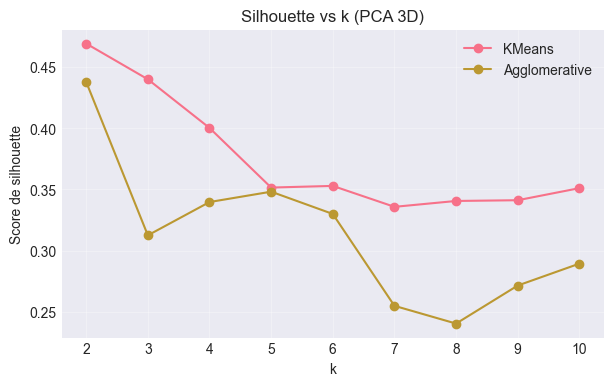

In [9]:
# 5.2 Choix du nombre de clusters et de la méthode (Silhouette)
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Vérifier que X_pca existe (sinon relancer 5.1)
if 'X_pca' not in globals():
    raise RuntimeError("X_pca introuvable. Exécutez d'abord la cellule 5.1 (PCA).")

n_samples = X_pca.shape[0]
k_max_possible = max(2, min(10, n_samples - 1))
k_values = list(range(2, k_max_possible + 1))

results = []
for k in k_values:
    # KMeans
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_km = km.fit_predict(X_pca)
    sil_km = silhouette_score(X_pca, labels_km)
    results.append({'method':'KMeans','k':k,'silhouette':sil_km})
    
    # Agglomerative (Ward)
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels_ag = ag.fit_predict(X_pca)
    sil_ag = silhouette_score(X_pca, labels_ag)
    results.append({'method':'Agglomerative','k':k,'silhouette':sil_ag})

df_scores = pd.DataFrame(results)
best_row = df_scores.loc[df_scores['silhouette'].idxmax()]
best_method = best_row['method']
best_k = int(best_row['k'])
best_score = best_row['silhouette']

print("Scores de silhouette par méthode et k :\n", df_scores.pivot(index='k', columns='method', values='silhouette').round(3))
print()
print(f"✅ Meilleur choix: {best_method} avec k={best_k} (silhouette={best_score:.3f})")

# Visualisation des scores
plt.figure(figsize=(7,4))
for method in ['KMeans','Agglomerative']:
    subset = df_scores[df_scores['method']==method]
    plt.plot(subset['k'], subset['silhouette'], marker='o', label=method)
plt.title('Silhouette vs k (PCA 3D)')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Conserver le meilleur choix en variables globales
best_model_name = best_method
best_n_clusters = best_k

### 5.3 Application du clustering sur l'espace PCA et visualisation 3D

In [10]:
# 5.3 Application du clustering choisi et 3D-plot
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import plotly.express as px
import numpy as np
import pandas as pd

# Sécuriser les prérequis
if 'X_pca' not in globals():
    raise RuntimeError("X_pca introuvable. Exécutez d'abord la cellule 5.1 (PCA).")
if 'best_model_name' not in globals() or 'best_n_clusters' not in globals():
    raise RuntimeError("Meilleur modèle non défini. Exécutez d'abord la cellule 5.2.")

# Fit final du meilleur modèle
if best_model_name == 'KMeans':
    model = KMeans(n_clusters=best_n_clusters, random_state=42, n_init=10)
elif best_model_name == 'Agglomerative':
    model = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
else:
    raise ValueError(f"Méthode non reconnue: {best_model_name}")

labels = model.fit_predict(X_pca)
sil = silhouette_score(X_pca, labels)

# Ajouter les labels au df et à df_pca
df['Cluster'] = labels
df_pca['Cluster'] = labels

print(f"Clusters obtenus: {np.bincount(labels)} (k={best_n_clusters})")
print(f"Score de silhouette final: {sil:.3f}")

# Visualisation 3D des clusters sur l'espace PCA
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
                    color=df_pca['Cluster'].astype(str),
                    title=f'Clustering {best_model_name} sur PCA (k={best_n_clusters})',
                    labels={'color':'Cluster'})
fig.update_traces(marker=dict(size=4, opacity=0.85))
fig.show()

# Optionnel: centroids en 3D (pour KMeans)
try:
    centers = model.cluster_centers_  # disponible pour KMeans
    centers_df = pd.DataFrame(centers, columns=['PC1','PC2','PC3'])
    import plotly.graph_objects as go
    fig_centers = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=df_pca['Cluster'].astype(str),
                                title=f'Clusters + Centroides (KMeans, k={best_n_clusters})')
    fig_centers.add_trace(go.Scatter3d(x=centers_df['PC1'], y=centers_df['PC2'], z=centers_df['PC3'],
                                       mode='markers', marker=dict(size=8, color='black', symbol='x'),
                                       name='Centroids'))
    fig_centers.show()
except Exception:
    pass

Clusters obtenus: [1328  904] (k=2)
Score de silhouette final: 0.469


---
## 8️) Modélisation Prédictive

### 8.1 Préparation des données pour la prédiction

### 8.2 Entraînement de plusieurs modèles

### 8.3 Comparaison des performances

### 8.4 Analyse détaillée du meilleur modèle

---
## 9️) Conclusions et Recommandations

### 9.1 Synthèse des Résultats

### 9.2 Recommandations Stratégiques

---

## Conclusion Finale

Cette analyse complète a permis de :


### Points Forts de l'Analyse
